In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

In [4]:
# reading the data set
spam_df = pd.read_csv("spam.csv")

In [5]:
# extra step
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
# giving spam and ham numerical values
spam_df['spam']=spam_df['Category'].apply(lambda x:1 if x=='spam'else 0)

In [7]:
# testing it 
spam_df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [8]:
# splitting train/test data
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam)

In [9]:
# find word count and store data as a matrix
cv= CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [10]:
model = SVC(kernel='linear')
model.fit(x_train_count,y_train)

SVC(kernel='linear')

In [31]:
# just a test to check functioning
sms_ham=['hello how are you?']
sms_ham_count=cv.transform(sms_ham)
model.predict(sms_ham_count)

array([0], dtype=int64)

In [25]:
# test model
x_test_count=cv.transform(x_test)
model.score(x_test_count, y_test)

0.9856424982053122

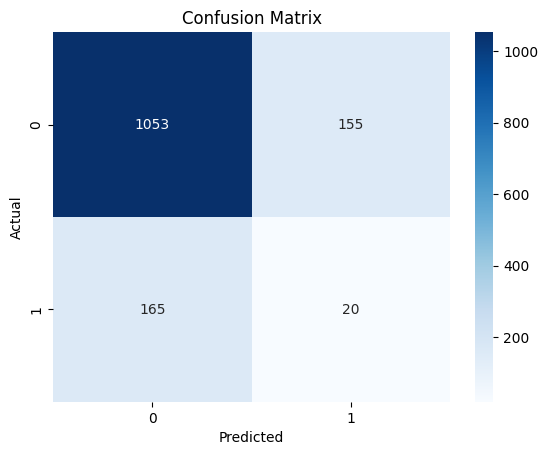

In [26]:
# confusion matrix
conf_mat = confusion_matrix(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()